# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [41]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import seaborn as sns
import scipy
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [5]:
#No. of observations in the dataset
df_raw.shape

(400, 4)

In [6]:
# No. of missing data in the dataset
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

Answer: There are 400 observations in our dataset

#### Question 2. Create a summary table

In [ ]:
#function


In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [31]:
df_raw.gre.skew()

-0.146046988215597

In [32]:
df_raw.gpa.skew()

-0.21688893296924305

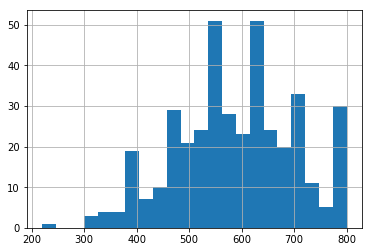

In [15]:
df_raw.gre.hist(bins=22)

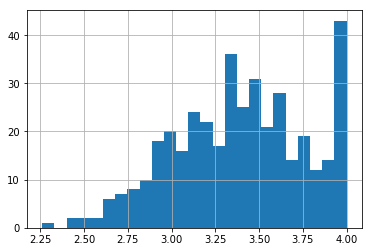

In [16]:
df_raw.gpa.hist(bins=25)

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 
GRE has a larger std than gpa becasue the data of GRE is more spread out from the mean as compared to the data points of gpa.
A standard deviation close to 0 indicates that the data points tend to be close to the mean. The further the data points are from the mean, the greater the standard deviation.

#### Question 4. Drop data points with missing data


In [23]:
df_raw.loc[df_raw['gre'].isnull() == True]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [27]:
df_raw = df_raw.dropna()

In [28]:
df_raw.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [29]:
df_raw.shape

(397, 4)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Based on the above solution - the data is dropped as it has only 397 observations as compared to total 400 observations. Also, isnull().sum() confirms that there is no null values and it has been dropped.

#### Question 6. Create box plots for GRE and GPA

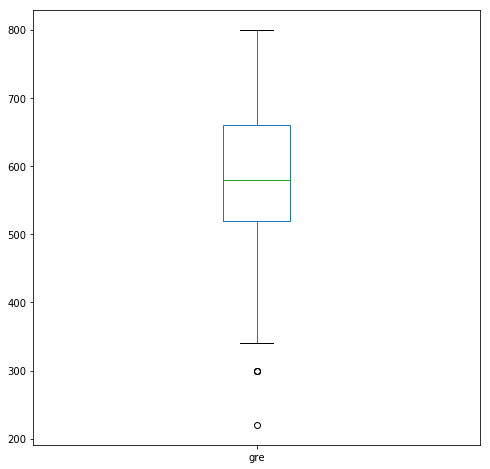

In [10]:
#boxplot 1
df_raw['gre'].plot(kind='box',figsize=(8,8))

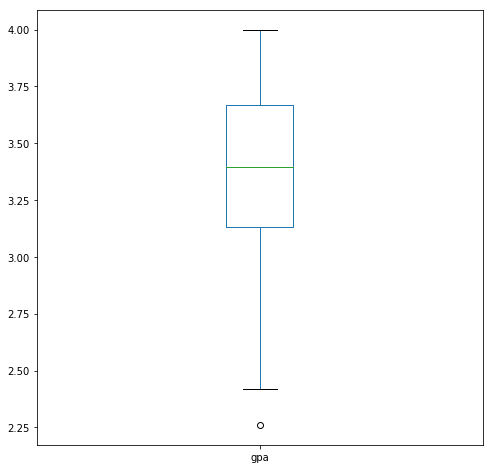

In [12]:
#boxplot 2 
df_raw['gpa'].plot(kind='box',figsize=(8,8))

#### Question 7. What do this plots show?

Answer: There are 2 outliers in boxplot1(gre) and it looks like normally distributed but more skewed toward right and 1 outlier in boxplot2 which is gpa which looks like normally distributed.

#### Question 8. Describe each distribution 

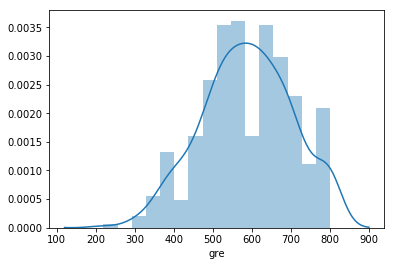

In [35]:
# plot the distribution of each variable 
sns.distplot(df_raw['gre'])

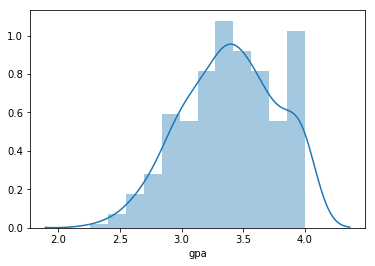

In [38]:
sns.distplot(df_raw['gpa'])

In [44]:
kg_result = scipy.stats.kstest(df_raw['gre'],cdf='norm')
kg_result

KstestResult(statistic=1.0, pvalue=0.0)

In [47]:
shapiro = scipy.stats.shapiro(df_raw['gre'])
shapiro

(0.9857397079467773, 0.0006041502929292619)

In [49]:
kg_result_gpa = scipy.stats.kstest(df_raw['gpa'],cdf='norm')
kg_result_gpa

KstestResult(statistic=0.98972085476178895, pvalue=0.0)

In [50]:
shapiro_gpa = scipy.stats.shapiro(df_raw['gpa'])
shapiro_gpa

(0.9772263765335083, 6.794117325625848e-06)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

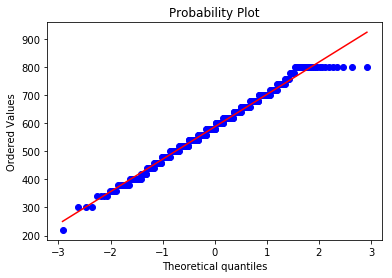

In [61]:
import scipy.stats as stats
import pylab 

stats.probplot(df_raw['gre'], dist="norm", plot=pylab)
pylab.show()

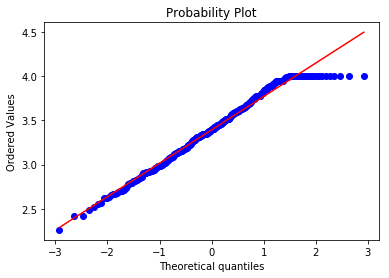

In [62]:
stats.probplot(df_raw['gpa'], dist = 'norm',plot=pylab)
pylab.show()

Answer: the q-q plot seems to waver towards the ends suggesting that it isn't a perfect normal distribution.The seaborn distplot shows the value is skewed to the right for both variables.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes since the distrubition isn't perfectly normal we might need correction

#### Question 11. Which of our variables are potentially colinear? 

In [63]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


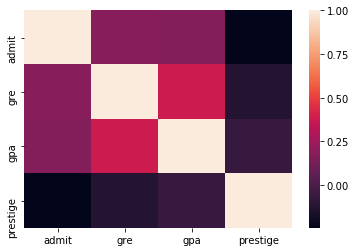

In [64]:
sns.heatmap(df_raw.corr())

From the above heatmap it looks like gre and gpa and colinear

#### Question 12. What did you find?

Answer: Based on both gre and gpa the grad the admission rate is positviely correlated

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: There is a negtive correlation between admission and prestige means that if the prestige increase then the admission rate doesn't increase

#### Question 14. What is your hypothesis? 

Answer: Students with higher prestige undergraduate schools have higher chances of admission rate

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [66]:
df_raw1 = pd.read_csv("../assets/admissions.csv")
df_raw1.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [74]:
df_raw1.loc[df_raw1['gre'].isnull() == True]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [80]:
df_raw1 = df_raw1.drop([187,212,236])

#### 2. Bonus: Log transform the skewed data

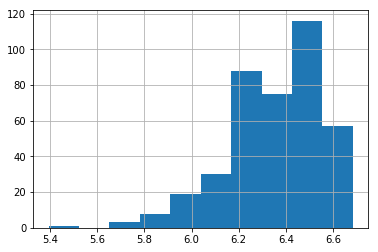

In [81]:
df_raw1['gre'].apply(np.log).hist()

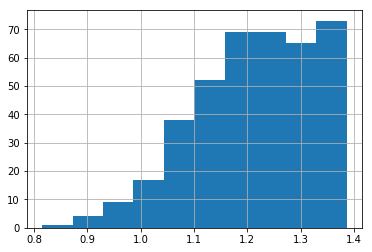

In [112]:
df_raw1['gpa'].apply(np.log).hist()

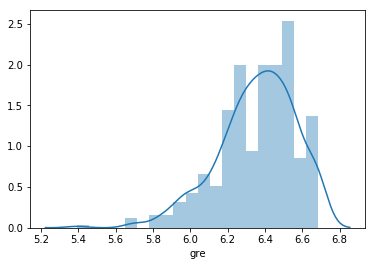

In [82]:
sns.distplot(df_raw1['gre'].apply(np.log))

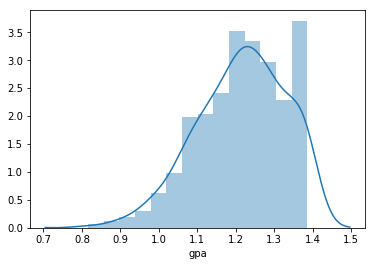

In [111]:
sns.distplot(df_raw1['gpa'].apply(np.log))

#### 3. Advanced: Impute missing data

In [89]:
df_raw_2 = pd.read_csv("../assets/admissions.csv")
df_raw_2.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [97]:
df_raw_2['gre'] = df_raw_2['gre'].fillna(df_raw_2.groupby('prestige')['gre'].transform('mean'))

In [98]:
df_raw_2.gre.isnull().sum()

0

In [106]:
df_raw_2['gpa'] = df_raw_2['gpa'].fillna(df_raw_2['gpa'].mean())

In [107]:
df_raw_2.gpa.isnull().sum()

0

In [109]:
df_raw_2['prestige'] = df_raw_2['prestige'].fillna(df_raw_2['prestige'].mean())

In [110]:
df_raw_2.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64